In [1]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q = sigmax()
q.eigenenergies()
q.eigenstates()
print(q)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]


In [3]:
ket_1 = basis(5,1)
ket_2 = basis(5,3)
dm = 0.3*ket2dm(ket_1)+0.7*ket2dm(ket_2)
print(dm.matrix_element(ket_1,ket_1))

(0.3+0j)


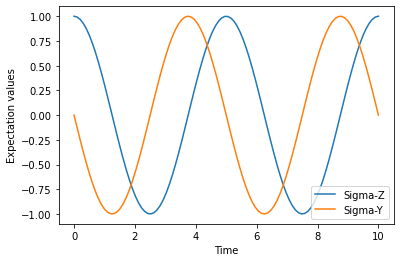

In [4]:
H = 2*np.pi * 0.1 * sigmax()
psi0 = basis(2, 0)
times = np.linspace(0.0, 10.0, 100)
result = mesolve(H, psi0, times,[] ,[sigmaz(), sigmay()])
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]) 
ax.plot(result.times, result.expect[1]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y")) 
plt.show() 

In [5]:
steps = 100 #size of the step (precision of simulation)
utau = 0.5 #size of the gap
delta= 1 #detuning
u = 0.2 #sweep rate
tau = utau/u
H0 = delta*sigmaz() #time-independent term
H1 = sigmax() #time-dependent term

In [6]:
print(tau)

2.5


In [7]:
def f1_t(t, args):
    """ evaluate the hamiltonian at time t. """
    return  t * args["sweep_rate"]

In [8]:
H = [H0, [H1, f1_t]]

In [9]:
print(H)

[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], [Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]], <function f1_t at 0x7fd0778d97e0>]]


In [10]:
tlist = np.linspace(-tau,0,steps)

In [11]:
print(tlist)

[-2.5        -2.47474747 -2.44949495 -2.42424242 -2.3989899  -2.37373737
 -2.34848485 -2.32323232 -2.2979798  -2.27272727 -2.24747475 -2.22222222
 -2.1969697  -2.17171717 -2.14646465 -2.12121212 -2.0959596  -2.07070707
 -2.04545455 -2.02020202 -1.99494949 -1.96969697 -1.94444444 -1.91919192
 -1.89393939 -1.86868687 -1.84343434 -1.81818182 -1.79292929 -1.76767677
 -1.74242424 -1.71717172 -1.69191919 -1.66666667 -1.64141414 -1.61616162
 -1.59090909 -1.56565657 -1.54040404 -1.51515152 -1.48989899 -1.46464646
 -1.43939394 -1.41414141 -1.38888889 -1.36363636 -1.33838384 -1.31313131
 -1.28787879 -1.26262626 -1.23737374 -1.21212121 -1.18686869 -1.16161616
 -1.13636364 -1.11111111 -1.08585859 -1.06060606 -1.03535354 -1.01010101
 -0.98484848 -0.95959596 -0.93434343 -0.90909091 -0.88383838 -0.85858586
 -0.83333333 -0.80808081 -0.78282828 -0.75757576 -0.73232323 -0.70707071
 -0.68181818 -0.65656566 -0.63131313 -0.60606061 -0.58080808 -0.55555556
 -0.53030303 -0.50505051 -0.47979798 -0.45454545 -0

In [12]:
U = propagator(H,tlist,args={"sweep_rate":u})

In [13]:
print(H0.eigenstates())

(array([-1.,  1.]), array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
       Qobj data =
       [[ 0.]
        [-1.]]                                                      ,
       Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
       Qobj data =
       [[-1.]
        [ 0.]]                                                      ],
      dtype=object))


In [14]:
print(H0.data)

  (0, 0)	(1+0j)
  (1, 1)	(-1+0j)


In [15]:
print(H0.eigenstates()[1][0])

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.]
 [-1.]]


In [16]:
f1_t(0.7,{'sweep_rate':2})

1.4

In [17]:
print(H0,H1)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]] Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]


In [18]:
Ht0 = 

SyntaxError: invalid syntax (2159197342.py, line 1)

In [ ]:
Ht = QobjEvo([H0,[H1,f1_t]],{'sweep_rate':u})

In [ ]:
print(Ht)

In [ ]:
sesolve(Ht,)

In [ ]:
print(H0.eigenstates()[1][0])